# Dialysis Facility Care Analysis

## 1. Business Understanding

This project aims to analyze dialysis facility care metrics to understand how clinical indicators such as transfusion rates, readmission rates, and hospitalization rates relate to patient mortality. 

### Business Questions

1. **How does the transfusion rate at a facility relate to the mortality rate?**
2. **Can we predict mortality rate using other clinical indicators?**
3. **Is a simple model using only transfusion rate sufficient for mortality prediction?**


## 2. Data Understanding

We begin by loading and exploring the dataset to understand its structure, identify missing values, and assess data quality.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def load_data(file_path):
    """Load the dialysis facility care dataset."""
    return pd.read_csv(file_path, encoding='ISO-8859-1')

df = load_data('DFC_FACILITY.csv')
df.head()

,CMS Certification Number (CCN),Network,Facility Name,Five Star Date,Five Star,Five Star Data Availability Code,Address Line 1,Address Line 2,City/Town,State,...,Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL,Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL,Long term catheter Data Availability Code,Number of patients in long term catheter summary,Number of patient months in long term catheter summary,Percentage of Adult patients with long term catheter in use,nPCR Data Availability Code,Number of patients in nPCR summary,Number of patient-months in nPCR summary,Percentage of pediatric HD patients with nPCR
0,12306,8,CHILDRENS HOSPITAL DIALYSIS,01Jan2020-31Dec2023,NaN,260,1600 7TH AVENUE SOUTH,NaN,BIRMINGHAM,AL,...,NaN,NaN,199,1.0,5.0,NaN,1,24.0,175.0,99.0
1,12500,8,FMC CAPITOL CITY,01Jan2020-31Dec2023,1.0,1,255 S JACKSON STREET,NaN,MONTGOMERY,AL,...,26.0,16.0,1,121.0,996.0,16.0,259,0.0,NaN,NaN
2,12501,8,DaVita Gadsden Dialysis,01Jan2020-31Dec2023,2.0,1,409 SOUTH FIRST STREET,NaN,GADSDEN,AL,...,30.0,19.0,1,82.0,460.0,12.0,259,0.0,NaN,NaN
3,12502,8,DaVita Tuscaloosa University Dialysis,01Jan2020-31Dec2023,1.0,1,220 15TH STREET,NaN,TUSCALOOSA,AL,...,24.0,28.0,1,96.0,898.0,11.0,259,0.0,NaN,NaN
4,12505,8,DaVita PDI-Montgomery,01Jan2020-31Dec2023,3.0,1,1001 FOREST AVENUE,NaN,MONTGOMERY,AL,...,28.0,19.0,1,77.0,663.0,14.0,259,0.0,NaN,NaN


In [25]:
def explore_data(df):
    """Print summary statistics and data types."""
    print(df.info())
    print(df.describe())
    print(df.isnull().sum())

explore_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7556 entries, 0 to 7555
Columns: 142 entries, CMS Certification Number (CCN) to Percentage of pediatric HD patients with nPCR
dtypes: float64(76), int64(27), object(39)
memory usage: 8.2+ MB
None
       CMS Certification Number (CCN)      Network    Five Star  \
count                     7556.000000  7556.000000  7013.000000   
mean                    329938.206458     9.687665     2.808071   
std                     203105.542118     4.774670     1.084406   
min                      12306.000000     1.000000     1.000000   
25%                     152578.500000     6.000000     2.000000   
50%                     332639.500000     9.000000     3.000000   
75%                     452794.500000    14.000000     3.000000   
max                     852609.000000    18.000000     5.000000   

       Five Star Data Availability Code      ZIP Code  # of Dialysis Stations  \
count                       7556.000000   7556.000000             755

### Missing Values Analysis

We visualize and quantify missing values to determine how to handle them appropriately.


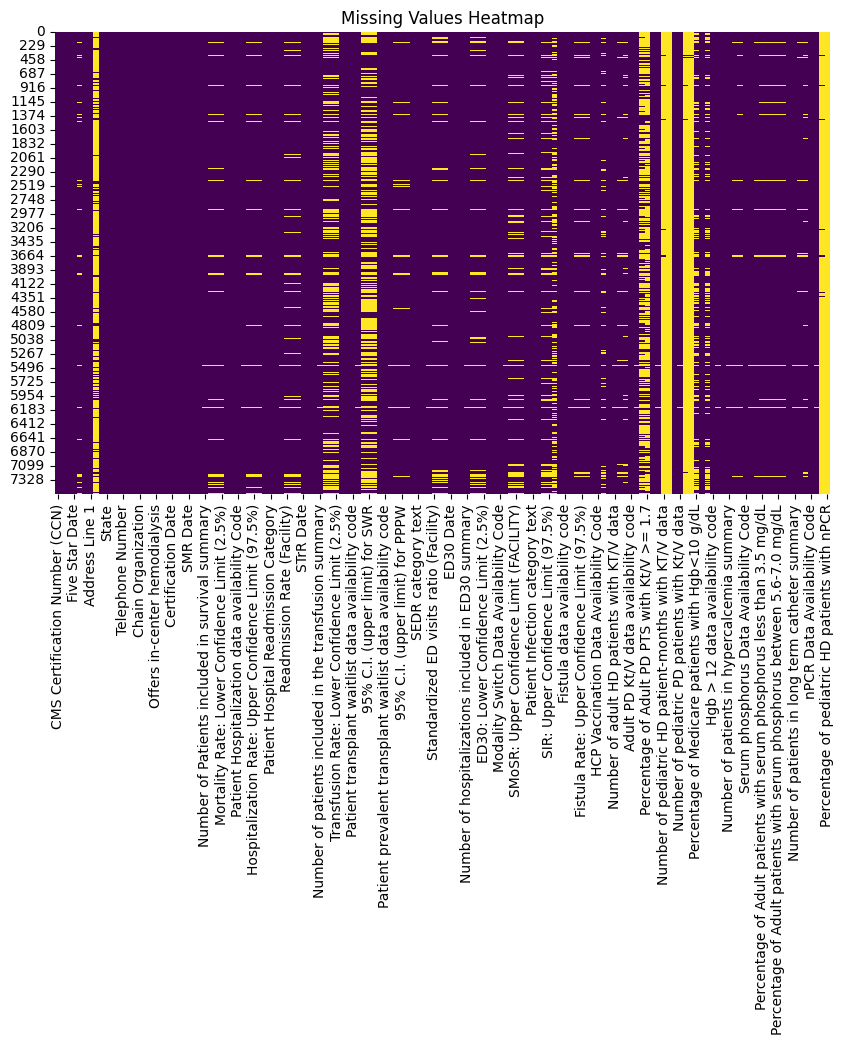

Missing values per column:
CMS Certification Number (CCN)                                    0
Network                                                           0
Facility Name                                                     0
Five Star Date                                                    0
Five Star                                                       543
                                                               ... 
Percentage of Adult patients with long term catheter in use     509
nPCR Data Availability Code                                       0
Number of patients in nPCR summary                               17
Number of patient-months in nPCR summary                       7369
Percentage of pediatric HD patients with nPCR                  7519
Length: 142, dtype: int64


In [26]:
def analyze_missing_values(df):
    """Visualize missing values using a heatmap."""
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values Heatmap")
    plt.show()
    print("Missing values per column:")
    print(df.isnull().sum())

analyze_missing_values(df)

### Justification for Dropping Missing Values

We focus on four clinical metrics. If any of these are missing, the record is excluded. This is acceptable because:

- The proportion of missing values is small.
- These metrics are critical for modeling and cannot be imputed reliably.
- Dropping them ensures model integrity without introducing bias.


## 3. Data Preparation

We select relevant columns and remove rows with missing values.


In [27]:
def clean_data(df):
    """Select relevant columns and drop rows with missing values."""
    cols = ['Mortality Rate (Facility)', 'Readmission Rate (Facility)', 
            'Hospitalization Rate (Facility)', 'Transfusion Rate (Facility)']
    return df[cols].dropna()

df_clean = clean_data(df)
df_clean.head()

,Mortality Rate (Facility),Readmission Rate (Facility),Hospitalization Rate (Facility),Transfusion Rate (Facility)
1,26.0,27.7,139.0,51.1
3,26.3,23.3,160.1,57.1
4,25.6,13.1,127.6,23.0
6,24.3,33.4,186.7,29.9
8,29.0,35.2,209.2,70.6


### Distribution of Clinical Metrics

We visualize the distribution of each clinical metric to understand their spread and detect outliers.


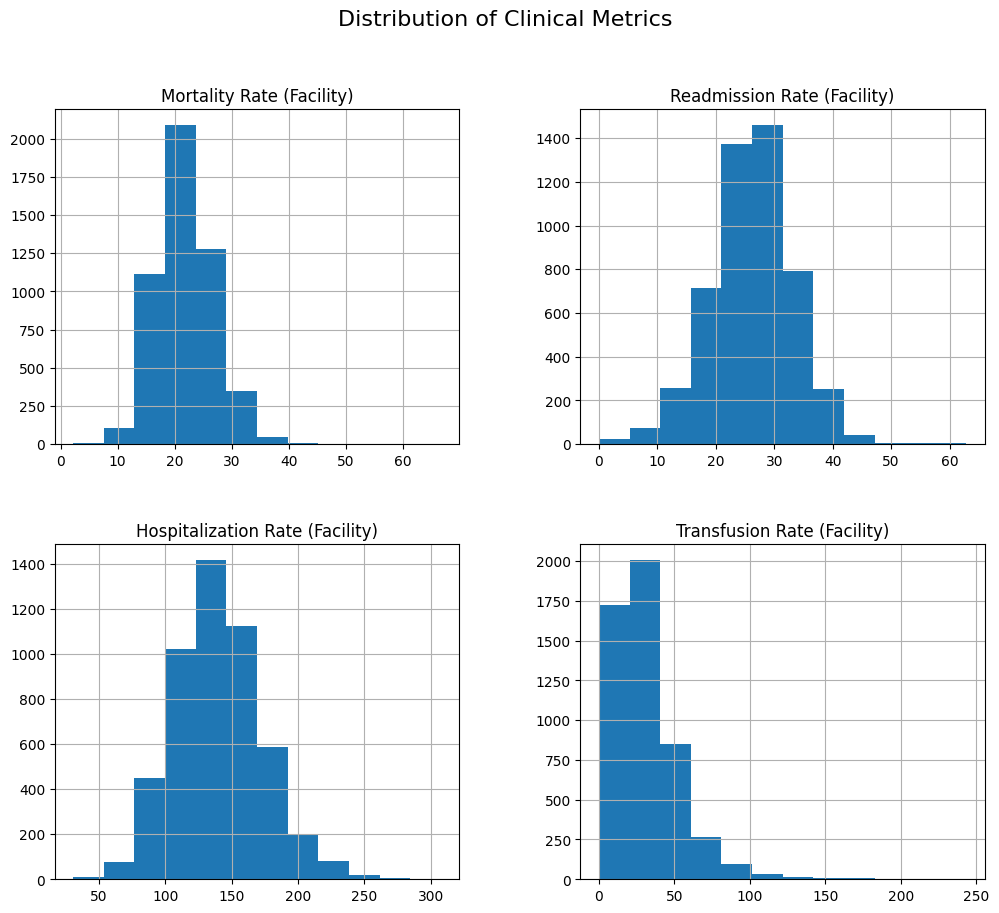

In [28]:
def plot_histograms(df):
    """Plot histograms of clinical metrics."""
    df.hist(bins=12, figsize=(12, 10))
    plt.suptitle("Distribution of Clinical Metrics", fontsize=16)
    plt.show()

plot_histograms(df_clean)

## 4. Data Modeling

We build two linear regression models:
- A full model using all clinical indicators.
- A simple model using only transfusion rate.


In [29]:
def split_data(df):
    """Split the dataset into training and testing sets."""
    X = df.drop(columns=['Mortality Rate (Facility)'])
    y = df['Mortality Rate (Facility)']
    return train_test_split(X, y, test_size=0.2, random_state=12)

X_train, X_test, y_train, y_test = split_data(df_clean)

In [30]:
def train_model(X_train, y_train):
    """Train a linear regression model."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

full_model = train_model(X_train, y_train)

In [31]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Evaluate model performance using RMSE and relative error."""
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    rmse_train = mean_squared_error(y_train, pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, pred_test, squared=False)
    print("Train RMSE:", rmse_train)
    print("Test RMSE:", rmse_test)
    rel_error = np.abs(pred_test - y_test) / y_test * 100
    print("Relative Errors (%):", rel_error[:10].values)

evaluate_model(full_model, X_train, X_test, y_train, y_test)

Train RMSE: 4.898256389774145
Test RMSE: 5.127931029201776
Relative Errors (%): [ 2.36448865 46.51394902 89.42139739  7.16557005 28.83239043  3.52098489
 33.59703882  3.30336793  6.46676561  5.13622335]


/opt/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
X_train_simple = X_train[['Transfusion Rate (Facility)']]
X_test_simple = X_test[['Transfusion Rate (Facility)']]
simple_model = train_model(X_train_simple, y_train)

In [33]:
simple_preds_test = simple_model.predict(X_test_simple)
simple_rmse_test = mean_squared_error(y_test, simple_preds_test, squared=False)
print("Simple Model Test RMSE:", simple_rmse_test)

Simple Model Test RMSE: 5.159587833715236


/opt/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 5. Evaluation

We now evaluate each business question using analysis and visualizations.


### Question 1: How does the transfusion rate at a facility relate to the mortality rate?

We use a scatter plot to visualize the relationship.


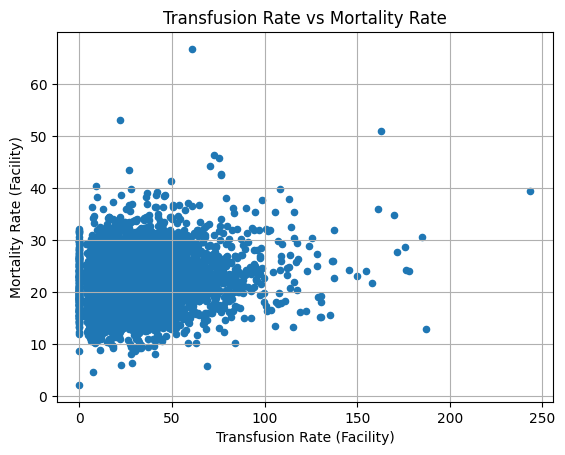

In [34]:
def plot_scatter(df):
    """Plot scatter of transfusion rate vs mortality rate."""
    df.plot(kind="scatter", x='Transfusion Rate (Facility)', y='Mortality Rate (Facility)', grid=True)
    plt.title("Transfusion Rate vs Mortality Rate")
    plt.show()

plot_scatter(df_clean)

**Explanation**: The scatter plot helps us visually assess whether higher transfusion rates are associated with higher mortality rates. This informs our understanding of clinical risk factors in dialysis care.


### Question 2: Can we predict mortality rate using other clinical indicators?

We evaluate the full model's performance.


In [35]:
evaluate_model(full_model, X_train, X_test, y_train, y_test)

Train RMSE: 4.898256389774145
Test RMSE: 5.127931029201776
Relative Errors (%): [ 2.36448865 46.51394902 89.42139739  7.16557005 28.83239043  3.52098489
 33.59703882  3.30336793  6.46676561  5.13622335]


/opt/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Explanation**: The full model uses all available clinical indicators. The RMSE and relative error help us assess how well these features explain mortality rate variation.


### Question 3: Is a simple model using only transfusion rate sufficient?

We compare the simple model's predictions to actual values.


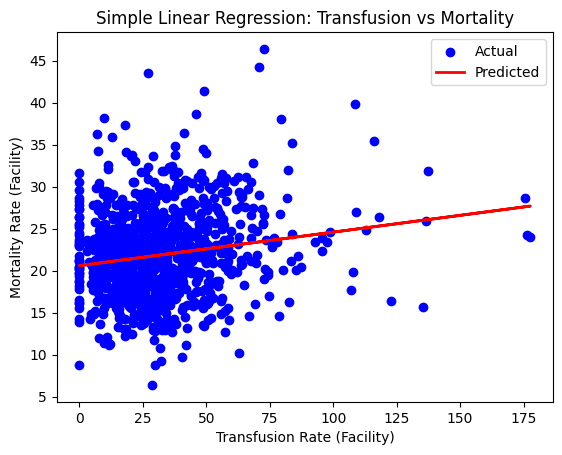

In [36]:
def plot_simple_model(X_test, y_test, predictions):
    """Plot predictions of simple linear regression model."""
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted')
    plt.xlabel("Transfusion Rate (Facility)")
    plt.ylabel("Mortality Rate (Facility)")
    plt.title("Simple Linear Regression: Transfusion vs Mortality")
    plt.legend()
    plt.show()

plot_simple_model(X_test_simple, y_test, simple_preds_test)

**Explanation**: This visualization shows how well a single feature (transfusion rate) can predict mortality. Comparing this to the full model helps us decide if a simpler model is sufficient for practical use.
